<a href="https://colab.research.google.com/github/ankitrahejagatech/7641HW1/blob/main/notebooks/ExplorationOfDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:

%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge  # Example estimator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
bank_marketing = fetch_ucirepo(id=222)
from sklearn.preprocessing import OneHotEncoder
#bank_marketing = pd.read_csv('/Users/ankitraheja/PycharmProjects/CS7641HW1/data/bank-additional.csv', sep=';')
#bankmarketing_df = pd.DataFrame(bank_marketing)
#bankmarketing_df.to_csv('bankmarketing.csv', index=False)
#DataEncoding

#MissingDataStrategy

X1 = pd.DataFrame(bank_marketing.data.features, columns=bank_marketing.feature_names)


y1 = pd.DataFrame(bank_marketing.data.targets)

y1['y'] = y1['y'].replace({'yes': 1, 'no': 0})

Note: you may need to restart the kernel to use updated packages.


In [91]:
X1.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [92]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#cat_var =["job", "marital", "education", "contact", "month", "poutcome"]
#for i in cat_var:
#  X1[i]= le.fit_transform(X1[i])

# print(X1['age'].unique())
# print(X1['job'].unique()) #modify
# one_hot = pd.get_dummies(X1['job'], prefix='job')
# X1 = X1.drop('job', axis=1)
# X1 = pd.concat([X1, one_hot], axis=1)
# print(X1['marital'].unique()) #modify
# one_hot = pd.get_dummies(X1['marital'], prefix='marital')
# # Drop the original 'Color' column from 'df'
# X1 = X1.drop('marital', axis=1)
# X1 = pd.concat([X1, one_hot], axis=1)
# #X1['marital_encoded'] = encoder.fit_transform(X1['marital'])
# print(X1['education'].unique()) #modify ordinal
X1['education'] = X1['education'].replace({'primary': 0, 'secondary':1,'tertiary':2})
# print(X1['default'].unique())  #modify
X1['default'] = X1['default'].replace({'yes': 1, 'no':0})
# print(X1['balance'].unique())
# print(X1['housing'].unique())  #modify
X1['housing'] = X1['housing'].replace({'yes': 1, 'no':0})
# #print(X1['loan'].unique())  #modify
X1['loan'] = X1['loan'].replace({'yes': 1, 'no':0})
# print(X1['contact'].unique())  #modify
#
# print(X1['day_of_week'].unique())
# #print(X1['month'].unique())  #modify
X1['month'] = X1['month'].replace({'may':5 ,'jun':6, 'jul' :7, 'aug' :8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3, 'apr':4, 'sep':9})
# print(X1['duration'].unique())
# print(X1['campaign'].unique())
# print(X1['pdays'].unique())
# print(X1['previous'].unique())
# #print(X1['poutcome'].unique()) #modify
X1['poutcome'] = X1['poutcome'].replace({'success': 1, 'failure': -1,'other':0})



In [93]:
X1

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,2.0,0,2143,1,0,NaN,5,5,261,1,-1,0,NaN
1,44,technician,single,1.0,0,29,1,0,NaN,5,5,151,1,-1,0,NaN
2,33,entrepreneur,married,1.0,0,2,1,1,NaN,5,5,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,5,92,1,-1,0,NaN
4,33,NaN,single,NaN,0,1,0,0,NaN,5,5,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,2.0,0,825,0,0,cellular,17,11,977,3,-1,0,NaN
45207,71,retired,divorced,0.0,0,1729,0,0,cellular,17,11,456,2,-1,0,NaN
45208,72,retired,married,1.0,0,5715,0,0,cellular,17,11,1127,5,184,3,1.0
45209,57,blue-collar,married,1.0,0,668,0,0,telephone,17,11,508,4,-1,0,NaN


In [94]:
X1_train, X1_subset, y1_train, y1_subset = train_test_split(X1, y1, test_size=.05, random_state=42, stratify=y1)

In [95]:
# #handle missing data
# #Option 1 Remove Rows with Missing Data
# #X1 = X1.dropna()
# #Option 2 Remove Columns with Missing Data
# #X1 = X1.dropna(axis=1)
#Option 3 Fill with mean or fill with mode based on logic
X1_subset = X1_subset.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))
# #Option 4 Advanced Imputation Techniques
#     #IterativeImputer/MICE
# iterative_imputer = IterativeImputer(estimator=BayesianRidge())
# numeric_cols = X1_subset.select_dtypes(include=['number']).columns
# X1_subset[numeric_cols] = iterative_imputer.fit_transform(X1_subset[numeric_cols])
# X1_subset = X1_subset.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' or x.dtype.name == 'category' else x)
# one_hot = pd.get_dummies(X1_subset['contact'], prefix='contact')
# # Drop the original 'Color' column from 'df'
# X1_subset = X1_subset.drop('contact', axis=1)
# X1_subset = pd.concat([X1_subset, one_hot], axis=1)

In [96]:
for col in X1_subset.select_dtypes(include=['float64']).columns:
    X1_subset[col] = X1_subset[col].fillna(0).astype(int)

for col in y1_subset.select_dtypes(include=['float64']).columns:
    y1_subset[col] = y1_subset[col].fillna(0).astype(int)

In [97]:
 y1_subset['y'].value_counts()


y
0    1996
1     265
Name: count, dtype: int64

In [98]:
breast_cancer = fetch_ucirepo(id=17)
#breast_cancer_df = pd.DataFrame(breast_cancer)
#breast_cancer_df.to_csv('breast_cancer.csv', index=False)
X2 = pd.DataFrame(breast_cancer.data.features, columns=breast_cancer.feature_names)
y2 = pd.DataFrame(breast_cancer.data.targets)

#print(y2.value_counts())
y2['Diagnosis'] = y2['Diagnosis'].replace({'M': 1, 'B': 0})

In [99]:
#bankmarketing
#education has missing values
#job has missing values
#contact has missing values
#poutcome has missing values
X1_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2261 entries, 128 to 20061
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          2261 non-null   int64 
 1   job          2261 non-null   object
 2   marital      2261 non-null   object
 3   education    2261 non-null   int64 
 4   default      2261 non-null   int64 
 5   balance      2261 non-null   int64 
 6   housing      2261 non-null   int64 
 7   loan         2261 non-null   int64 
 8   contact      2261 non-null   object
 9   day_of_week  2261 non-null   int64 
 10  month        2261 non-null   int64 
 11  duration     2261 non-null   int64 
 12  campaign     2261 non-null   int64 
 13  pdays        2261 non-null   int64 
 14  previous     2261 non-null   int64 
 15  poutcome     2261 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 300.3+ KB


In [100]:
#nomissingdata
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [101]:
X1_subset.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [102]:


X2.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [103]:
print(X1_subset.describe())

               age    education      default       balance      housing  \
count  2261.000000  2261.000000  2261.000000   2261.000000  2261.000000   
mean     41.590889     1.162760     0.014595   1447.735515     0.542238   
std      10.676510     0.649746     0.119953   3394.242551     0.498323   
min      20.000000     0.000000     0.000000  -1746.000000     0.000000   
25%      33.000000     1.000000     0.000000     89.000000     0.000000   
50%      40.000000     1.000000     0.000000    479.000000     1.000000   
75%      50.000000     2.000000     0.000000   1520.000000     1.000000   
max      93.000000     2.000000     1.000000  98417.000000     1.000000   

              loan  day_of_week        month     duration     campaign  \
count  2261.000000  2261.000000  2261.000000  2261.000000  2261.000000   
mean      0.153914    15.758514     6.134011   251.283061     2.713843   
std       0.360946     8.402121     2.473255   236.551329     2.954662   
min       0.000000     1.000

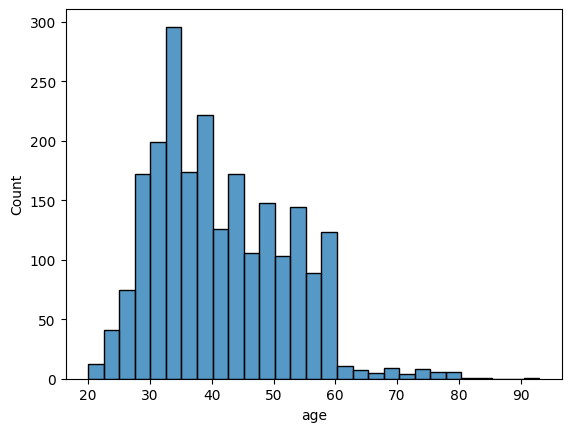

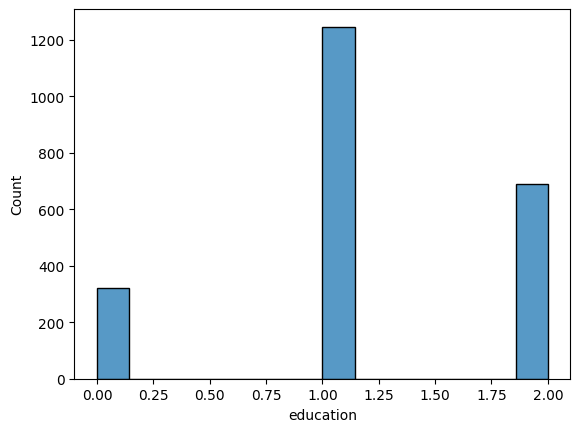

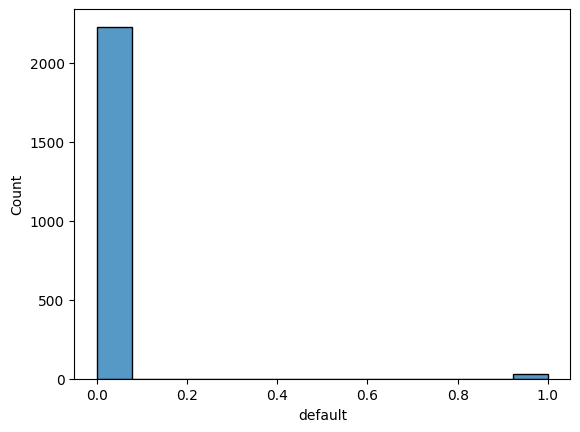

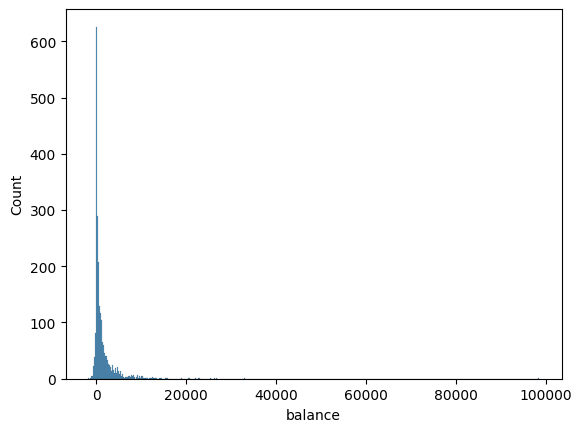

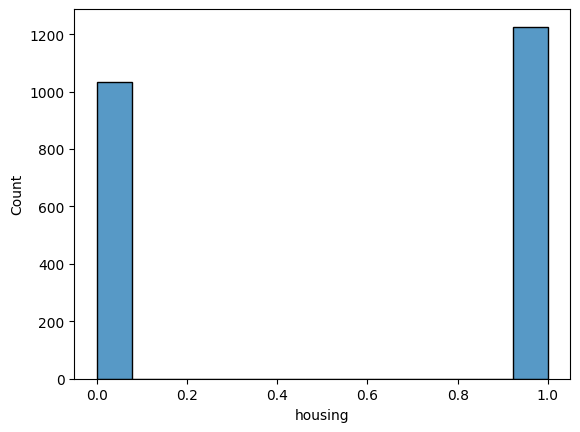

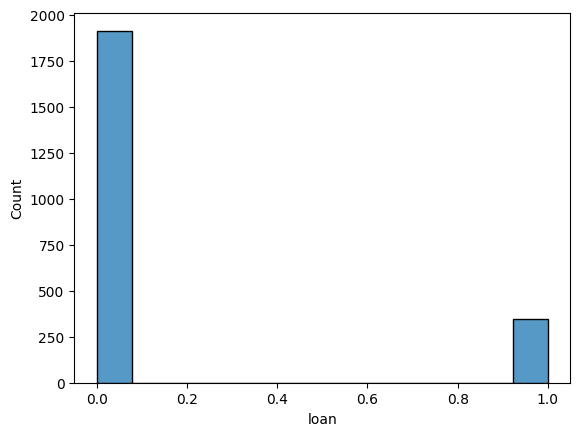

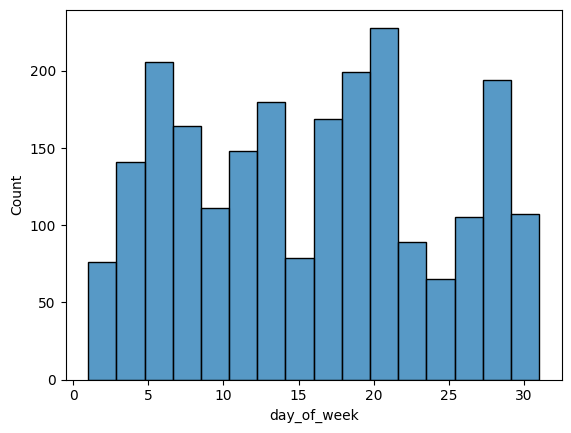

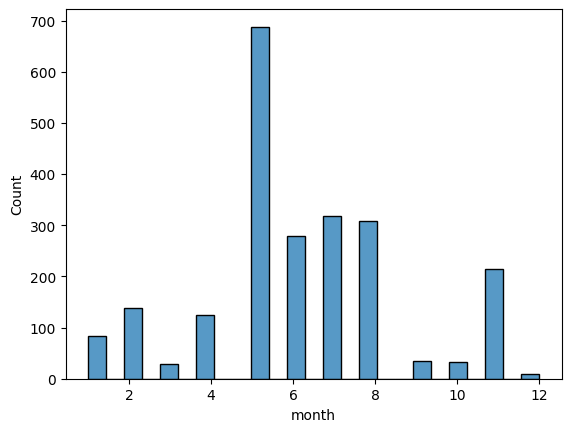

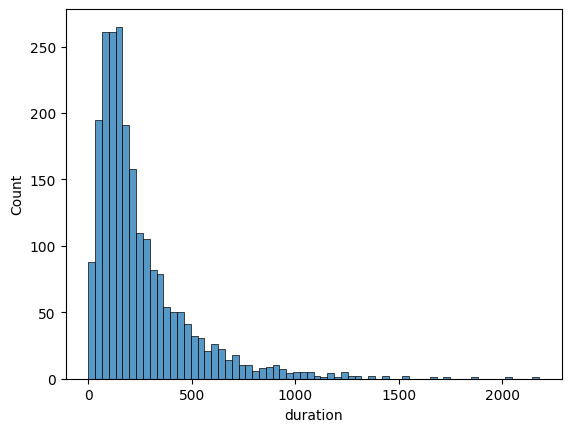

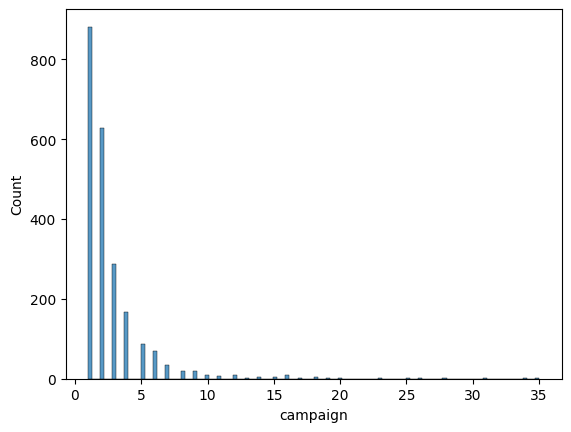

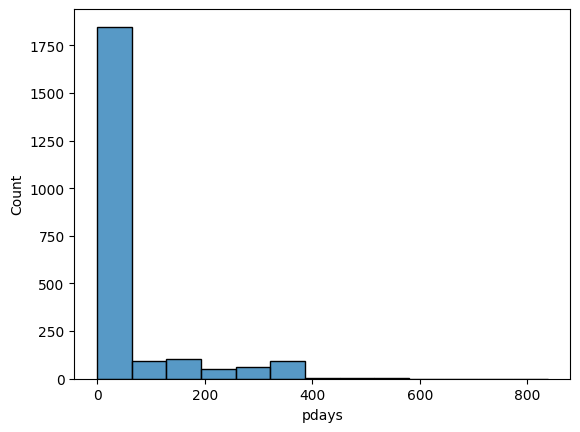

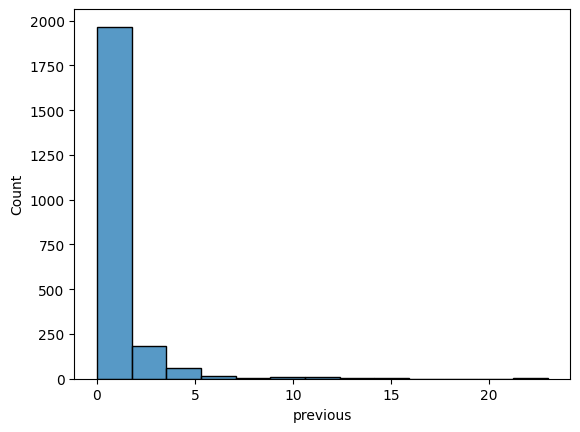

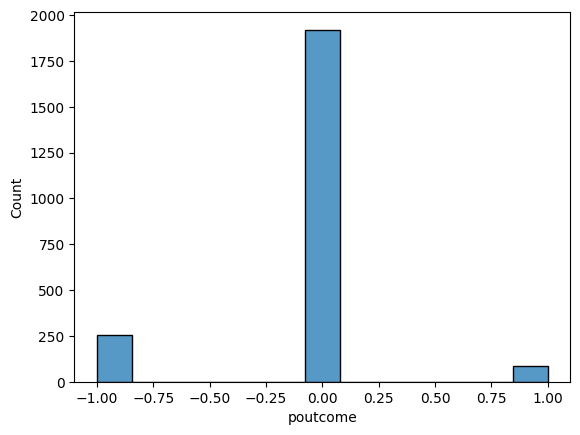

In [104]:
for column in X1_subset.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(data=X1_subset, x=column)
    plt.show()

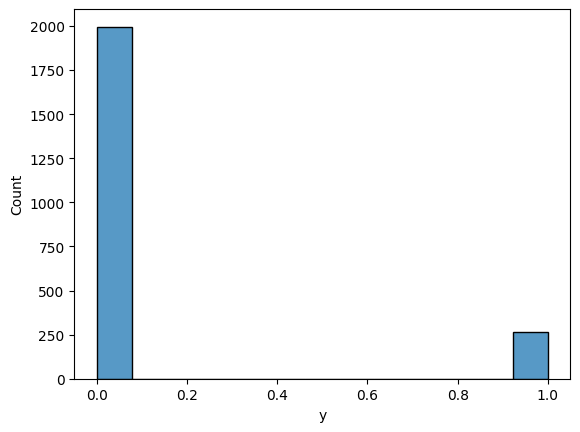

In [105]:

for column in y1_subset.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(data=y1_subset, x=column)
    plt.show()

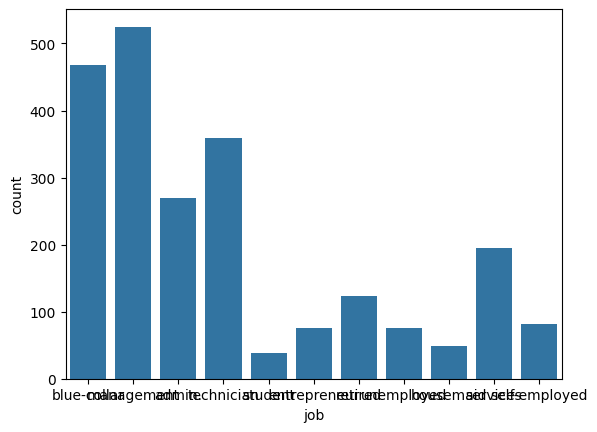

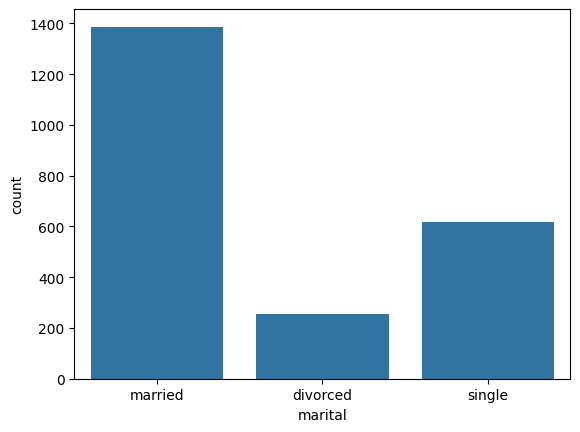

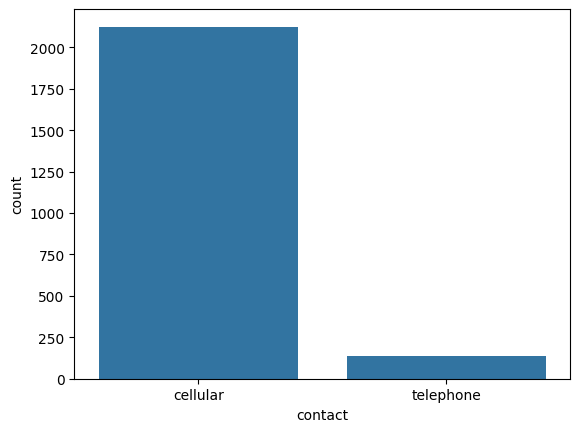

In [106]:
for column in X1_subset.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(data=X1_subset, x=column)
    plt.show()

In [107]:
def return_numerical(df):
    return df.select_dtypes(include=['int64', 'float64'])
X1_subset_numerical = return_numerical(X1_subset)

In [108]:
correlation_matrix = X1_subset_numerical.corr()

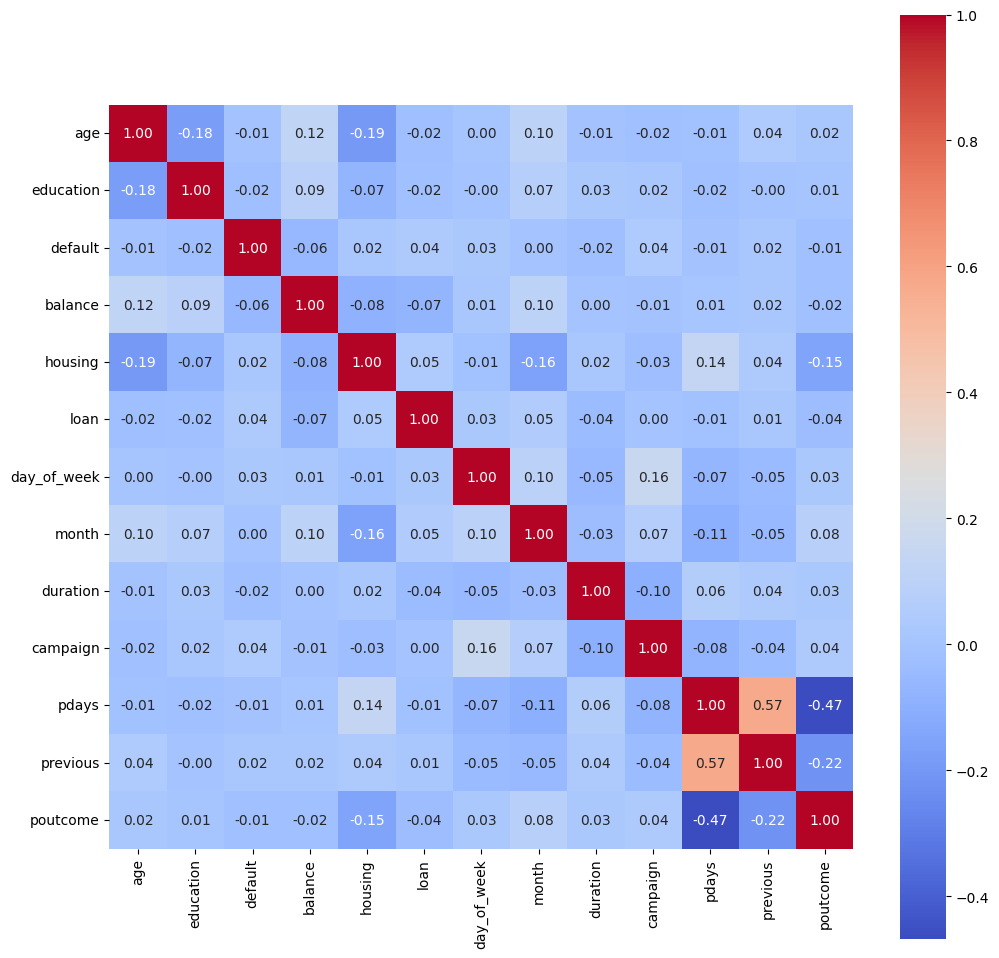

In [109]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

In [110]:
correlation_matrix=correlation_matrix.abs()

In [111]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
threshold = 0.5
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop highly correlated columns
X1_subset_reduced = X1_subset.drop(columns=to_drop)

print(f"Columns to drop: {to_drop}")
print(f"Reduced DataFrame shape: {X1_subset_reduced.shape}")

Columns to drop: ['previous']
Reduced DataFrame shape: (2261, 15)


In [112]:
# #To remove highly correlated variables in a dataset using Scikit-learn, you typically follow these steps:
#
# Calculate the correlation matrix.
# Identify pairs of highly correlated variables (e.g., with a correlation coefficient greater than a threshold).
# Remove one of each pair of highly correlated variables.
# Here is a step-by-step approach to achieve this using Scikit-learn along with Pandas:

In [113]:
X1_subset_reduced

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,poutcome
128,31,blue-collar,married,1,0,0,1,0,cellular,5,5,143,1,-1,0
23830,35,management,married,0,0,365,0,0,cellular,29,8,41,2,-1,0
43402,53,admin.,married,1,0,459,0,0,cellular,5,4,558,1,-1,0
15943,51,technician,divorced,1,1,-113,0,1,cellular,22,7,314,4,-1,0
3162,53,admin.,married,1,0,4464,1,0,cellular,14,5,162,3,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,37,blue-collar,married,1,0,43,1,0,cellular,20,6,250,3,-1,0
37659,38,management,single,2,0,-119,1,0,cellular,14,5,185,1,-1,0
308,44,blue-collar,married,1,0,129,1,1,cellular,5,5,189,2,-1,0
28335,28,self-employed,single,2,0,0,1,0,cellular,29,1,379,1,192,-1


In [114]:
print("index of duplicated rows : ",list(X1_subset_reduced[X1_subset_reduced.duplicated()].index))
X1_subset_reduced = X1_subset_reduced.drop_duplicates()

index of duplicated rows :  []


In [115]:
X1_subset_reduced


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,poutcome
128,31,blue-collar,married,1,0,0,1,0,cellular,5,5,143,1,-1,0
23830,35,management,married,0,0,365,0,0,cellular,29,8,41,2,-1,0
43402,53,admin.,married,1,0,459,0,0,cellular,5,4,558,1,-1,0
15943,51,technician,divorced,1,1,-113,0,1,cellular,22,7,314,4,-1,0
3162,53,admin.,married,1,0,4464,1,0,cellular,14,5,162,3,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,37,blue-collar,married,1,0,43,1,0,cellular,20,6,250,3,-1,0
37659,38,management,single,2,0,-119,1,0,cellular,14,5,185,1,-1,0
308,44,blue-collar,married,1,0,129,1,1,cellular,5,5,189,2,-1,0
28335,28,self-employed,single,2,0,0,1,0,cellular,29,1,379,1,192,-1


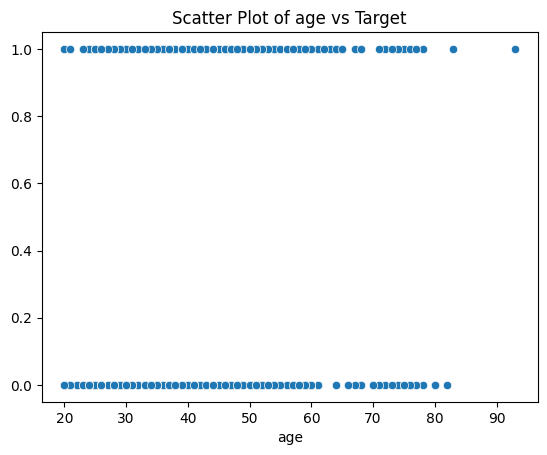

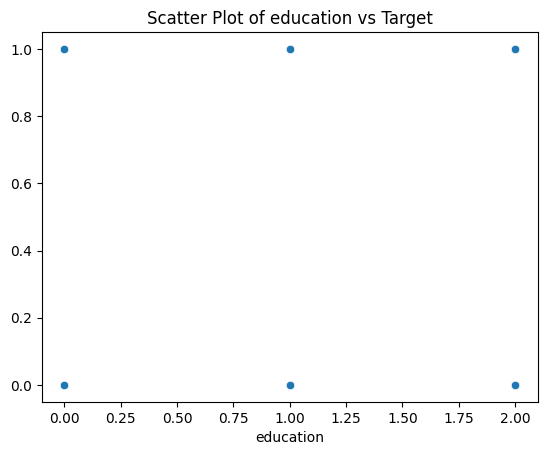

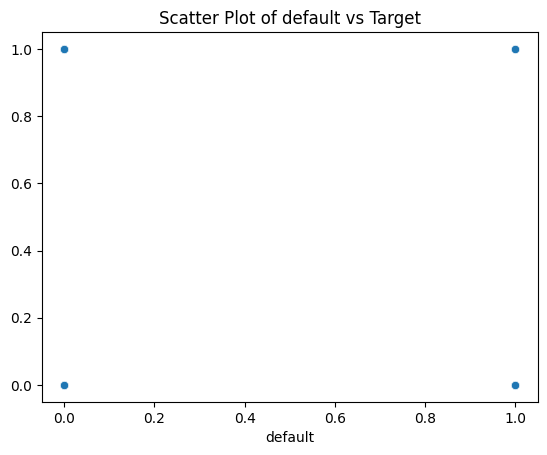

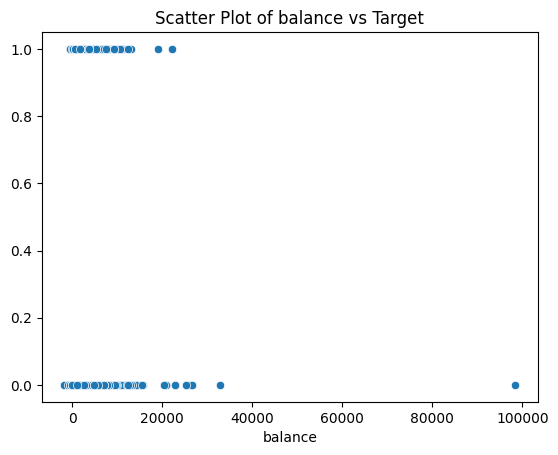

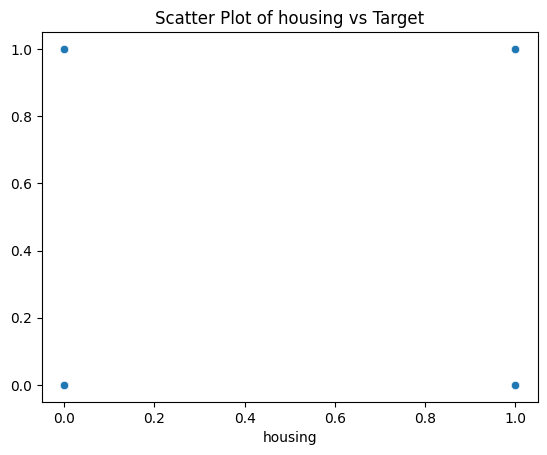

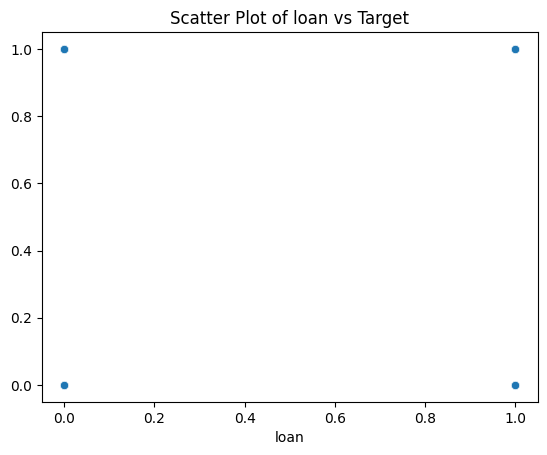

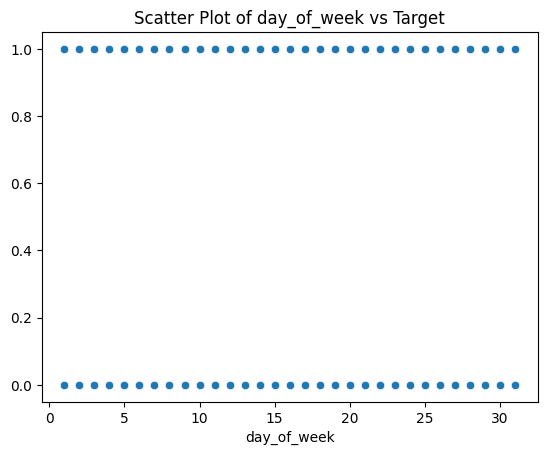

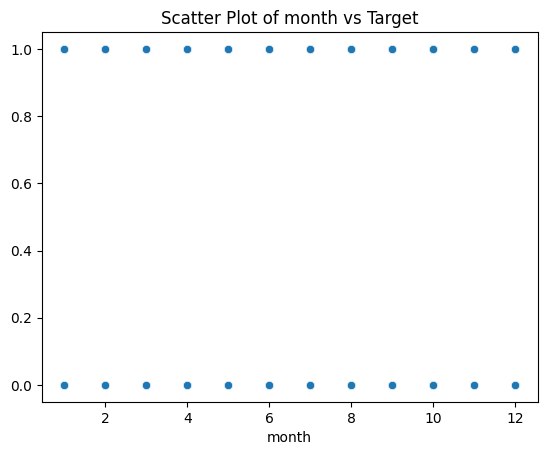

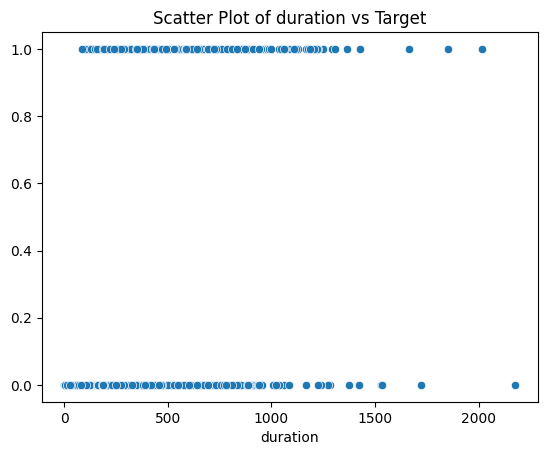

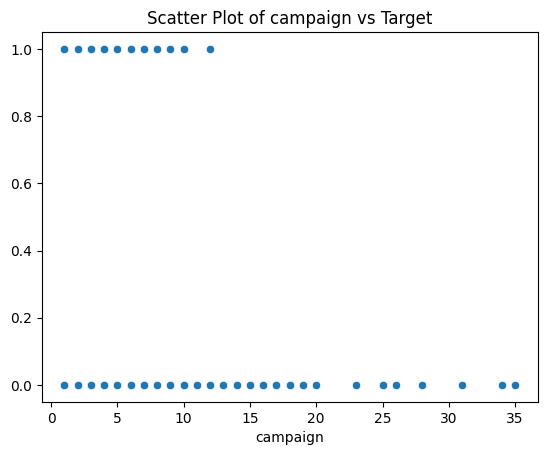

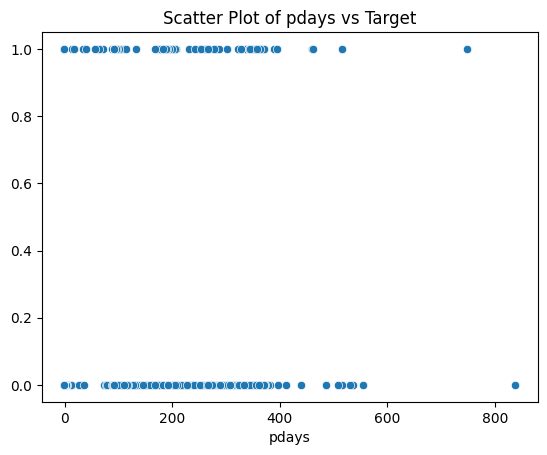

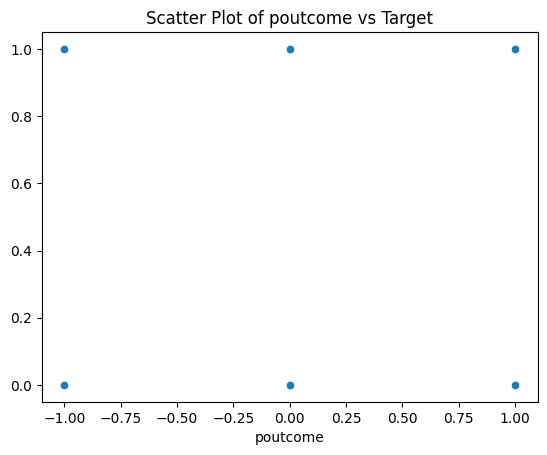

In [116]:
for column in X1_subset_reduced.select_dtypes(include=['float', 'int']).columns:
    sns.scatterplot(data=X1_subset, x=column, y=y1_subset.values.flatten())
    plt.title(f'Scatter Plot of {column} vs Target')
    plt.show()

In [117]:
X1_subset_reduced = X1_subset_reduced.drop(columns=['day_of_week'], axis=1)

In [118]:
y1_subset

,y
128,0
23830,0
43402,1
15943,0
3162,0
...,...
11817,0
37659,0
308,0
28335,0


In [119]:
from statsmodels.graphics.mosaicplot import mosaic

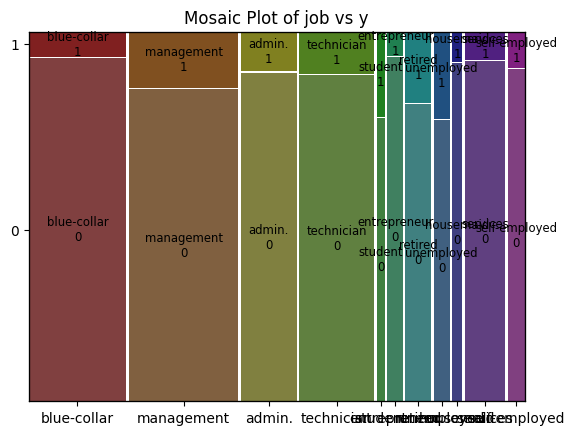

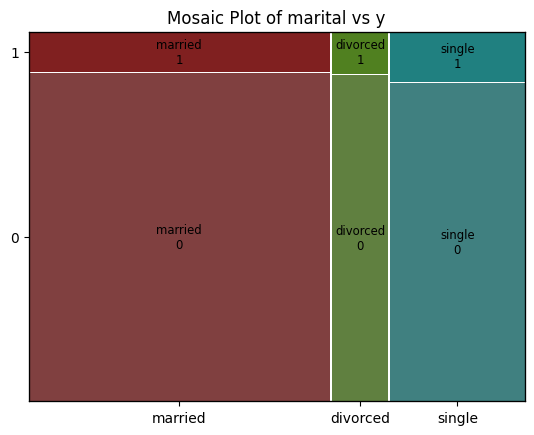

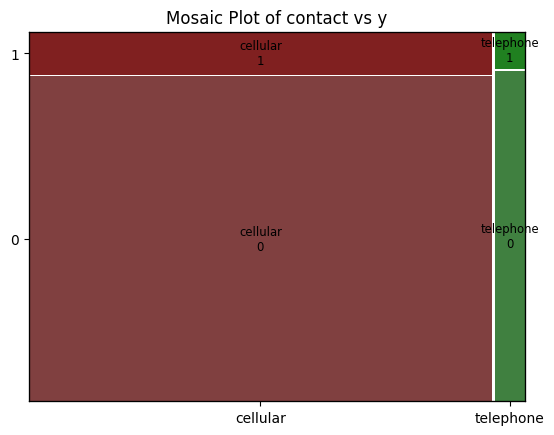

In [120]:
df = pd.concat([X1_subset, y1_subset], axis=1)

# Define the dependent variable name for convenience
dependent_variable = 'y'

# Plot mosaic plots
for column in X1_subset.select_dtypes(include=['object', 'category']).columns:
    mosaic(df, [column, dependent_variable])
    plt.title(f'Mosaic Plot of {column} vs {dependent_variable}')
    plt.show()



In [121]:
#X1_subset_reduced = X1_subset_reduced.drop(columns=['contact','job','education'], axis=1)
def return_categorical(df):
    return df.select_dtypes(include=['object'])
categorical_columns = list(return_categorical(X1_subset_reduced).columns)
X1_subset_reduced = pd.get_dummies(X1_subset_reduced, columns=categorical_columns)



In [122]:
X1_subset_reduced

,age,education,default,balance,housing,loan,month,duration,campaign,pdays,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone
128,31,1,0,0,1,0,5,143,1,-1,...,False,False,False,False,False,False,True,False,True,False
23830,35,0,0,365,0,0,8,41,2,-1,...,False,False,False,False,False,False,True,False,True,False
43402,53,1,0,459,0,0,4,558,1,-1,...,False,False,False,False,False,False,True,False,True,False
15943,51,1,1,-113,0,1,7,314,4,-1,...,False,False,False,True,False,True,False,False,True,False
3162,53,1,0,4464,1,0,5,162,3,-1,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,37,1,0,43,1,0,6,250,3,-1,...,False,False,False,False,False,False,True,False,True,False
37659,38,2,0,-119,1,0,5,185,1,-1,...,False,False,False,False,False,False,False,True,True,False
308,44,1,0,129,1,1,5,189,2,-1,...,False,False,False,False,False,False,True,False,True,False
28335,28,2,0,0,1,0,1,379,1,192,...,True,False,False,False,False,False,False,True,True,False


In [123]:
y1_subset

,y
128,0
23830,0
43402,1
15943,0
3162,0
...,...
11817,0
37659,0
308,0
28335,0


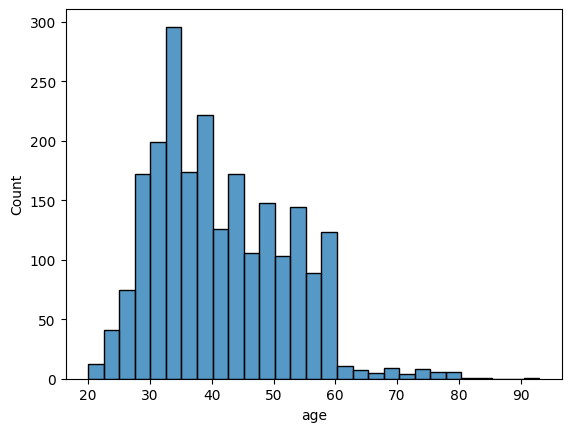

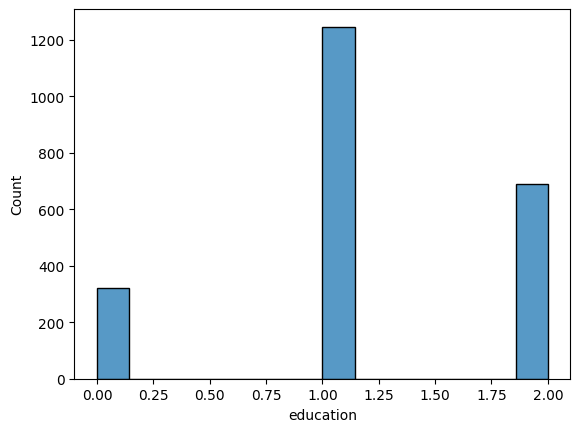

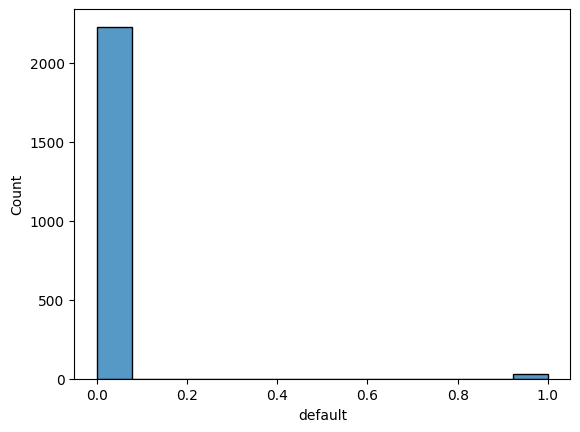

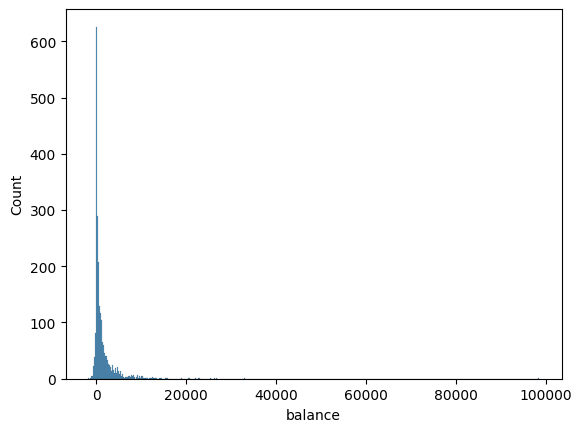

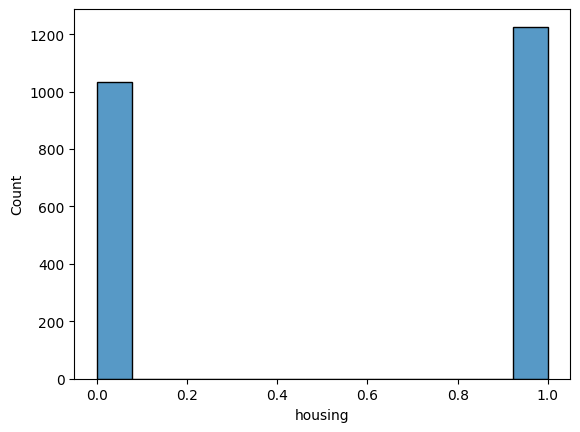

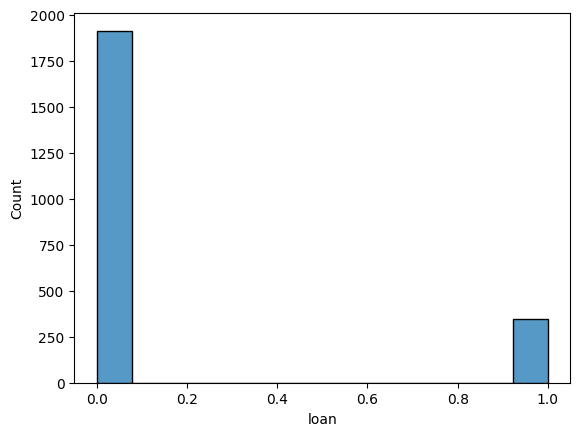

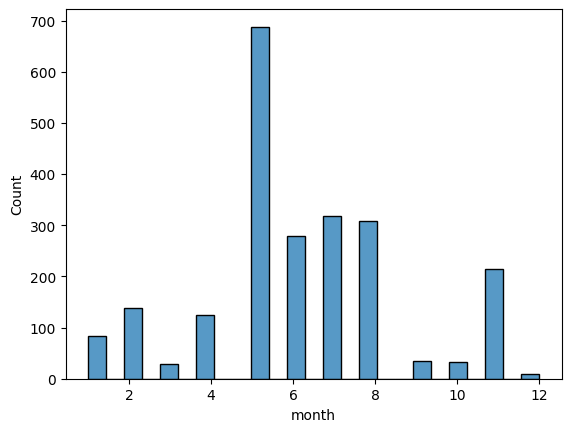

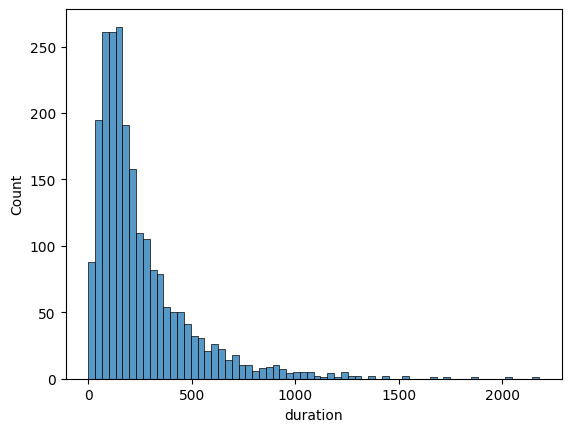

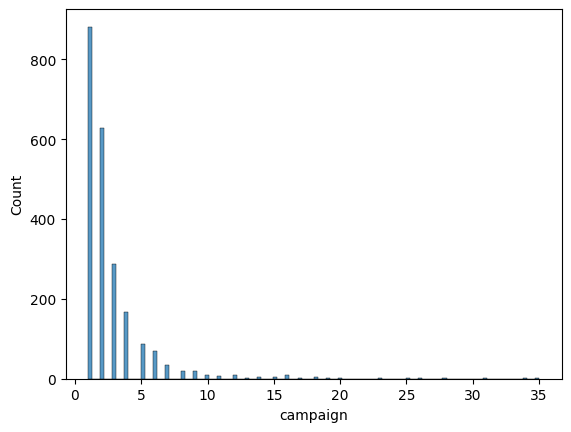

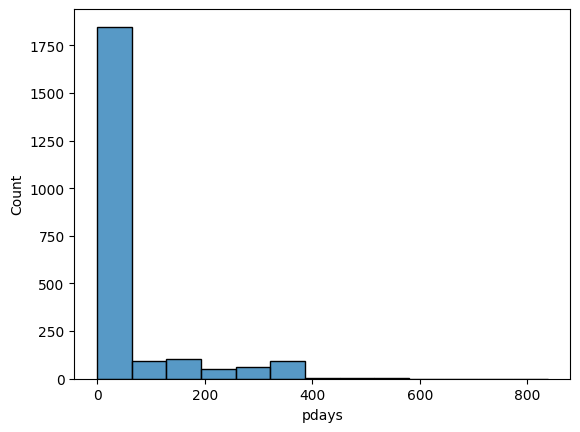

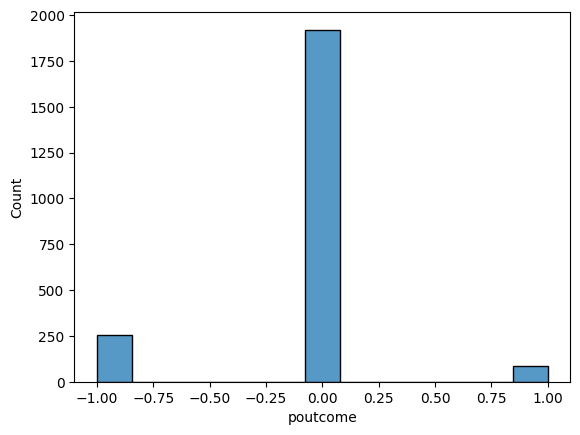

In [124]:
for column in X1_subset_reduced.select_dtypes(include=['float', 'int']).columns:
    sns.histplot(data=X1_subset_reduced, x=column)
    plt.show()

In [125]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
#X1_subset_reduced
scaler = StandardScaler()
X1_subset_reduced = scaler.fit_transform(X1_subset_reduced)

In [126]:
X1_subset_reduced

array([[-0.99219988, -0.25055299, -0.12170247, ..., -0.6139864 ,
         0.25397036, -0.25397036],
       [-0.61746273, -1.78995602, -0.12170247, ..., -0.6139864 ,
         0.25397036, -0.25397036],
       [ 1.06885443, -0.25055299, -0.12170247, ..., -0.6139864 ,
         0.25397036, -0.25397036],
       ...,
       [ 0.22569585, -0.25055299, -0.12170247, ..., -0.6139864 ,
         0.25397036, -0.25397036],
       [-1.27325274,  1.28885004, -0.12170247, ...,  1.62870058,
         0.25397036, -0.25397036],
       [ 0.88148585, -0.25055299, -0.12170247, ..., -0.6139864 ,
         0.25397036, -0.25397036]])

In [127]:
X1_subset_reduced = pd.DataFrame(X1_subset_reduced)

In [128]:
X1_subset_reduced

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.992200,-0.250553,-0.121702,-0.426621,0.918808,-0.426513,-0.458611,-0.457858,-0.580176,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
1,-0.617463,-1.789956,-0.121702,-0.319062,-1.088366,-0.426513,0.754634,-0.889150,-0.241652,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
2,1.068854,-0.250553,-0.121702,-0.291362,-1.088366,-0.426513,-0.863026,1.296906,-0.580176,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
3,0.881486,-0.250553,8.216760,-0.459920,-1.088366,2.344595,0.350219,0.265189,0.435394,-0.420590,...,-0.192759,-0.307222,-0.132483,2.301749,-0.186501,2.804758,-1.259745,-0.613986,0.25397,-0.25397
4,1.068854,-0.250553,-0.121702,0.888838,0.918808,-0.426513,-0.458611,-0.377520,0.096871,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,-0.430094,-0.250553,-0.121702,-0.413950,0.918808,-0.426513,-0.054196,-0.005425,0.096871,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
2257,-0.336410,1.288850,-0.121702,-0.461688,0.918808,-0.426513,-0.458611,-0.280268,-0.580176,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,-1.259745,1.628701,0.25397,-0.25397
2258,0.225696,-0.250553,-0.121702,-0.388607,0.918808,2.344595,-0.458611,-0.263354,-0.241652,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
2259,-1.273253,1.288850,-0.121702,-0.426621,0.918808,-0.426513,-2.076271,0.540032,-0.580176,1.484279,...,5.187830,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,-1.259745,1.628701,0.25397,-0.25397


In [129]:
#%pip install imblearn
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_train_res, y_train_res = smote.fit_resample(X1_subset_reduced, y1_subset)

# Convert back to DataFrame if needed
#X1_subset_reduced = pd.DataFrame(X_train_res, columns=X1_subset_reduced.columns)


In [130]:
X1_subset_reduced

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.992200,-0.250553,-0.121702,-0.426621,0.918808,-0.426513,-0.458611,-0.457858,-0.580176,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
1,-0.617463,-1.789956,-0.121702,-0.319062,-1.088366,-0.426513,0.754634,-0.889150,-0.241652,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
2,1.068854,-0.250553,-0.121702,-0.291362,-1.088366,-0.426513,-0.863026,1.296906,-0.580176,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
3,0.881486,-0.250553,8.216760,-0.459920,-1.088366,2.344595,0.350219,0.265189,0.435394,-0.420590,...,-0.192759,-0.307222,-0.132483,2.301749,-0.186501,2.804758,-1.259745,-0.613986,0.25397,-0.25397
4,1.068854,-0.250553,-0.121702,0.888838,0.918808,-0.426513,-0.458611,-0.377520,0.096871,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,-0.430094,-0.250553,-0.121702,-0.413950,0.918808,-0.426513,-0.054196,-0.005425,0.096871,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
2257,-0.336410,1.288850,-0.121702,-0.461688,0.918808,-0.426513,-0.458611,-0.280268,-0.580176,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,-1.259745,1.628701,0.25397,-0.25397
2258,0.225696,-0.250553,-0.121702,-0.388607,0.918808,2.344595,-0.458611,-0.263354,-0.241652,-0.420590,...,-0.192759,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,0.793812,-0.613986,0.25397,-0.25397
2259,-1.273253,1.288850,-0.121702,-0.426621,0.918808,-0.426513,-2.076271,0.540032,-0.580176,1.484279,...,5.187830,-0.307222,-0.132483,-0.434452,-0.186501,-0.356537,-1.259745,1.628701,0.25397,-0.25397


In [131]:
X1_subset_reduced.to_csv('bankmarketing_X.csv', index=False)
X2.to_csv('breastcancer_X.csv', index=False)
y1_subset.to_csv('bankmarketing_Y.csv', index=False)
y2.to_csv('breastcancer_Y.csv', index=False)
